## Advanced tuning of parameters

In this tutorial, we will apply the skills from previous tutorials and build a classifier using the `Pipelines` and `FeatureUnion` functions from sklearn.

In [5]:
# IMPORT PACKAGES
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom python")
from silvhua import *
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [7]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

### Data

We will be building a binary classifier that predicts wheter a person has diabetes or not, using information on the patient's health. 

The data can be found [here](https://drive.google.com/file/d/1TvCKlmH3Z32XAKk-VUcZyYu95Ccyw3PO/view?usp=sharing). 


In [3]:
col_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv('pima-indians-diabetes.csv',sep=';')
data

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = data[col_names[:-1]]
y = data['class']
X

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


### Task

Build classifier which predicts the target variable `class` using rest of the attributes. The model should be fitted using pipeline that contains:
- PCA method
- SelectKBest method
- FeatureUnion
- Random Forest

Choose the best set of parameters using `Pipeline` and grid_search.

> #### Note
> **In this exercise, we are focusing on the implementation of pipeline. Since we have only 9 columns in our dataset the PCA is probably not the best technique to use during the data preparation from a methodology point of view.**

In [32]:
scaler = StandardScaler()
pca = PCA()
selection = SelectKBest()

combined_features = FeatureUnion([('pca', pca), ('univ_select', selection)])

random_forest = RandomForestClassifier()

In [35]:
pipeline = Pipeline([('scaler', scaler),
    ('features', combined_features),
    ('forest', random_forest)
    ])
param_grid = {
    'features__pca__n_components': [1, 2, 3],
    'features__univ_select__k': [1, 2, 3],
    'forest__n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(pipeline, param_grid)


In [36]:
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                                                       ('univ_select',
                                                                        SelectKBest())])),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'features__pca__n_components': [1, 2, 3],
                         'features__univ_select__k': [1, 2, 3],
                         'forest__n_estimators': [100, 200, 300]})

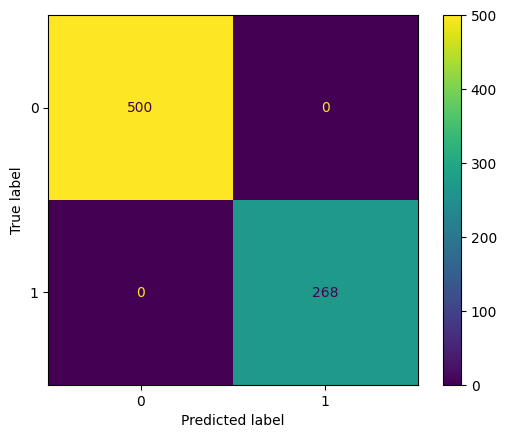

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_search, X, y)